In [65]:
import numpy as np
import matplotlib.pyplot as plt
import json,os
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [84]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [96]:
data_folfer = 'data/'
with open(f"flink_metric_data_new/1dh1e3d93h944idh991i576e48917264_13604_129570_read_records_per_second.json") as f:
    data = json.load(f)
df = pd.DataFrame(data['datapoints'])
df.drop('unit',axis=1,inplace=True)
df.head()

,average,timestamp
0,50.22,1541174400000
1,54.04,1541174700000
2,60.96,1541175000000
3,33.19,1541175300000
4,33.30,1541175600000


In [4]:
def L(a,b):
    S=0
    l=len(a)
    for i in range(l):
        S+=abs(a[i]-b[i])
    return S/l

In [5]:
def MSE(a,b):
    S=0
    l=len(a)
    for i in range(l):
        S+=(a[i]-b[i])**2
    return S/l

In [6]:
def RMSE(a,b):
    S=0
    l=len(a)
    for i in range(l):
        S+=(a[i]-b[i])**2
    return np.sqrt(S/l)

In [97]:
learnX=df['average'][:1000]
learnY=df['average'][1:1001]
testX=df['average'][1000:2016]
testY=df['average'][1001:2017]
x = np.array(learnX).reshape((-1, 1))
y = np.array(learnY)
x1 = np.array(testX).reshape((-1, 1))
y1 = np.array(testY)

intercept: 1.9107399545186894
slope: [0.96520858]


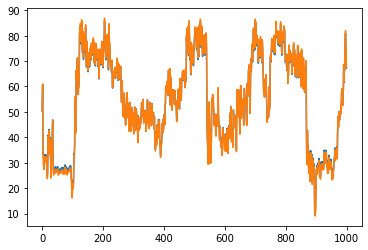

In [17]:
modelLR = LinearRegression().fit(x, y)
y_pred = model.predict(x)
plt.plot(y_pred)
plt.plot(x)
print('intercept:', modelLR.intercept_)
print('slope:', modelLR.coef_)

In [12]:
def misL(pred,test):
    return L(pred,test)
def misMSE(pred,test):
    return MSE(pred,test)
def misRMSE(pred,test):
    return RMSE(pred,test)

In [120]:
def test(model):
    files=os.listdir(path="flink_metric_data_new")
    res=[[],[],[]]
    score1=[]
    score2=[]
    score3=[]
    for i in files:
        name=f"flink_metric_data_new/"+i
        with open(name) as f:
            data = json.load(f)
        df = pd.DataFrame(data['datapoints'])
        df.drop('unit',axis=1,inplace=True)
        df.head()
        x = np.array(df['average']).reshape((-1, 1))
        y_pred = model.predict(x)
        score1.append(mean_absolute_error(model.predict(x), x))
        score2.append(mean_squared_error(model.predict(x), x))
        score3.append(np.sqrt(mean_squared_error(model.predict(x), x)))
    res[0].append(np.min(score1))
    res[0].append(np.max(score1))
    res[0].append(np.mean(score1))
    res[1].append(np.min(score2))
    res[1].append(np.max(score2))
    res[1].append(np.mean(score2))
    res[2].append(np.min(score3))
    res[2].append(np.max(score3))
    res[2].append(np.mean(score3))
    return res

In [33]:
class SW:
    def predict(dt):
        S=0
        k=10
        pred=[]
        for i in range(k+1):
            pred.append(float(dt[i]))
        for i in range(len(dt)):
            S+=dt[i]
            if(i<k+1):
                continue
            S-=dt[i-k]
            pre=S/k
            pred.append(float(pre))
        return pred
        

In [71]:
test(modelLR)


[[0.06763451347744061, 4804.506569098072, 42.864868497728466],
 [0.004579801451538541, 30653306.307776764, 100036.23555183334],
 [0.0676742303357677, 5536.542811879699, 45.93931339471247]]

In [45]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [80]:
class ES:
    def predict(series):
        alpha=0.9
        result = [series[0]] # first value is same as series
        for n in range(1, len(series)):
            result.append(alpha * series[n] + (1 - alpha) * result[n-1])
        return result

In [128]:
learnX=df['average'][:len(df['average'])-1]
learnY=df['average'][1:len(df['average'])]
x = np.array(learnX).reshape((-1, 1))
y = np.array(learnY)
modelLR2 = LinearRegression().fit(x, y)


In [75]:
test(modelLR)

[[0.06763451347744061, 4804.506569098072, 42.864868497728466],
 [0.004579801451538541, 30653306.307776764, 100036.23555183334],
 [0.0676742303357677, 5536.542811879699, 45.93931339471247]]

In [74]:
test(SW)

[[0.0, 25975.427433316818, 150.21722406675022],
 [0.0, 813969403.8832685, 1619800.3689281482],
 [0.0, 28530.149033667323, 187.2212308381759]]

In [ ]:
альфа=0.5

In [76]:
test(ES)

[[0.0, 2117.814579812305, 17.326247303012998],
 [0.0, 13407821.61764579, 41657.27506289559],
 [0.0, 3661.669239246739, 40.47495863652502]]

In [79]:
test(modelLR2)

[[0.02159088838724072, 5158.150184895164, 45.976126537059415],
 [0.0004720346263561252, 35331638.19445539, 115308.84306919246],
 [0.02172635787139955, 5944.042243663431, 49.27809701138182]]

In [ ]:
альфа=0.9

In [81]:
test(ES)

[[0.0, 323.0989843482713, 3.139250637954453],
 [0.0, 331476.73020317964, 1296.0618992896946],
 [0.0, 575.7401585812645, 7.605511905210256]]

In [129]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(x, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [87]:
test(regressor)

[[2.0365368274429256, 138065.6219623203, 1195.1560077232696],
 [7.018673104273741, 25316043829.108467, 82573468.04882276],
 [2.6492778458051056, 159110.16255760807, 1285.0483483016544]]

In [121]:
files=os.listdir(path="flink_metric_data_new")
for i in files:
    name=f"flink_metric_data_new/"+i
    with open(name) as f:
        data = json.load(f)
    df = pd.DataFrame(data['datapoints'])
    df.drop('unit',axis=1,inplace=True)
    df.head()
    learnX=df['average'][:len(df['average'])-1]
    learnY=df['average'][1:len(df['average'])]
    x = np.array(learnX).reshape((-1, 1))
    y = np.array(learnY)
    modelLR2.fit(x, y)

In [122]:
test(modelLR2)

[[0.0, 138149.49796232028, 1211.6867928028803],
 [0.0, 25339211648.507263, 82774395.51466416],
 [0.0, 159182.95024438787, 1300.7228726937783]]

In [130]:
files=os.listdir(path="flink_metric_data_new")
for i in files:
    name=f"flink_metric_data_new/"+i
    with open(name) as f:
        data = json.load(f)
    df = pd.DataFrame(data['datapoints'])
    df.drop('unit',axis=1,inplace=True)
    df.head()
    learnX=df['average'][:len(df['average'])-1]
    learnY=df['average'][1:len(df['average'])]
    x = np.array(learnX).reshape((-1, 1))
    y = np.array(learnY)
    regressor.fit(x, y)

In [131]:
test(regressor)

[[0.0, 138149.49796232028, 1211.6867928028803],
 [0.0, 25339211648.507263, 82774395.51466416],
 [0.0, 159182.95024438787, 1300.7228726937783]]

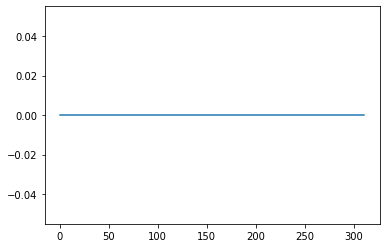

In [105]:
i="10h4id8fd1ii4477diifdd5d3iig9596_15360_205827_read_records_per_second.json"
name=f"flink_metric_data_new/"+i
with open(name) as f:
    data = json.load(f)
df = pd.DataFrame(data['datapoints'])
df.drop('unit',axis=1,inplace=True)
df.head()
plt.plot(df["average"])

In [106]:
mean1=[]
mean2=[]
mean3=[]
mean4=[]
spread1=[]
spread2=[]
spread3=[]
spread4=[]
zero=[]
period1=[]
period2=[]

In [112]:
files=os.listdir(path="flink_metric_data_new")
har1=[]
har2=[]
har3=[]
for i in files:
    name=f"flink_metric_data_new/"+i
    with open(name) as f:
        data = json.load(f)
    df = pd.DataFrame(data['datapoints'])
    df.drop('unit',axis=1,inplace=True)
    df.head()
    me=np.mean(df['average'])
    ma=np.max(df['average'])
    har1.append(me)
    har2.append(np.min(df['average']))
    har3.append(ma)
    if(me<100):
        mean1.append(i)
    elif(me<1000):
        mean2.append(i)
    elif(me<10000):
        mean3.append(i)
    else:
        mean4.append(i)
    if(ma==0):
        zero.append(i)
    elif(ma<me*5):
        spread1.append(i)
    elif(ma<me*10):
        spread2.append(i)
    elif(ma<me*20):
        spread3.append(i)
    else:
        spread4.append(i)
    pa=me+(ma-me)/2
    result = np.where(np.logical_and(df['average']>= pa*0.9,df['average']<= pa*1.1))
    if(len(result)<7):
        period1.append(i)
    else:
        period2.append(i)

In [113]:
files1=spread1

In [114]:
def test1(model):
    res=[[],[],[]]
    score1=[]
    score2=[]
    score3=[]
    for i in files1:
        name=f"flink_metric_data_new/"+i
        with open(name) as f:
            data = json.load(f)
        df = pd.DataFrame(data['datapoints'])
        df.drop('unit',axis=1,inplace=True)
        df.head()
        x = np.array(df['average']).reshape((-1, 1))
        y_pred = model.predict(x)
        score1.append(mean_absolute_error(model.predict(x), x))
        score2.append(mean_squared_error(model.predict(x), x))
        score3.append(np.sqrt(mean_squared_error(model.predict(x), x)))
    res[0].append(np.min(score1))
    res[0].append(np.max(score1))
    res[0].append(np.mean(score1))
    res[1].append(np.min(score2))
    res[1].append(np.max(score2))
    res[1].append(np.mean(score2))
    res[2].append(np.min(score3))
    res[2].append(np.max(score3))
    res[2].append(np.mean(score3))
    return res

In [116]:
for i in files1:
    name=f"flink_metric_data_new/"+i
    with open(name) as f:
        data = json.load(f)
    df = pd.DataFrame(data['datapoints'])
    df.drop('unit',axis=1,inplace=True)
    df.head()
    learnX=df['average'][:len(df['average'])-1]
    learnY=df['average'][1:len(df['average'])]
    x = np.array(learnX).reshape((-1, 1))
    y = np.array(learnY)
    print(i)
    modelLR2.fit(x, y)

10h4id8fd1ii4477diifdd5d3iig9596_15360_129942_read_records_per_second.json
10h4id8fd1ii4477diifdd5d3iig9596_15360_129942_write_records_per_second.json
10h4id8fd1ii4477diifdd5d3iig9596_15360_130545_read_records_per_second.json
10h4id8fd1ii4477diifdd5d3iig9596_15360_130545_write_records_per_second.json
10h4id8fd1ii4477diifdd5d3iig9596_15360_149764_read_records_per_second.json
10h4id8fd1ii4477diifdd5d3iig9596_15360_149764_write_records_per_second.json
10h4id8fd1ii4477diifdd5d3iig9596_15360_149765_read_records_per_second.json
10h4id8fd1ii4477diifdd5d3iig9596_15360_149765_write_records_per_second.json
10h4id8fd1ii4477diifdd5d3iig9596_15360_154067_read_records_per_second.json
10h4id8fd1ii4477diifdd5d3iig9596_15360_154067_write_records_per_second.json
10h4id8fd1ii4477diifdd5d3iig9596_15360_154068_read_records_per_second.json
10h4id8fd1ii4477diifdd5d3iig9596_15360_154068_write_records_per_second.json
10h4id8fd1ii4477diifdd5d3iig9596_15360_155055_read_records_per_second.json
10h4id8fd1ii4477dii